In [1]:
#Week 3 assignment, joining CSV and shapefile and doing data exploration for our final project on the quality of life survey in the Gauteng region. Given that I already did some data exploration in the Week 2 exercise, I spent most of my time this week trying to 1)learn how to merge the files 2)Creating maps with a variable (BW_Trust), with the average response for that variable then being shaded in on the map.
import pandas as pd


In [2]:
#Importing CSV file and packages needed for this assignment
qol17=pd.read_csv('qols-v-2017-2018-v1.1.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25,128,373,374,376,377) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [6]:
#Importing ward shapefile
wards_shp=gpd.read_file("MDB_Wards_2020.shp")

In [7]:
#Viewing CSV and shapefile, to identify which column to best use to merge them together. Both have a ward ID which we decided to use.
wards_shp.head(6)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,Shape__Are,Shape__Len,geometry
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,7.471513e+06,16412.790406,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
1,2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,5.893438e+06,12204.147922,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2,2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,5.162054e+06,11148.288066,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
3,2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,8.131083e+06,13451.889717,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
4,2900,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,5.578942e+07,41007.760780,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."
5,2901,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,6,City of Johannesburg,JHB,2020-11-26,79800006,JHB_6,4.465860e+07,42351.199133,"POLYGON ((27.89361 -26.40314, 27.89316 -26.404..."


In [8]:
qol17.head(3)

,resp_id,ward,munic,munic_recode,region,ea_code,sp_code,sp_name,mp_code,mp_name,...,Q17_02_5,Q17_02_6,Q17_02_7,Q17_02_8,Q17_02_9,Q17_02_10,Q17_02_11,Q17_02_12,Q17_02_13,Q17_02_14
0,7391,74201002,Emfuleni,Emfuleni,Sedibeng,76010738,760004018,Sebokeng Hostels,760004,Sebokeng,...,No,No,No,No,No,Yes,No,No,No,No
1,7392,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Yes,No,No,No,No,Yes,No,No,No,No
2,7417,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Yes,No,No,No,No,Yes,No,No,No,No


In [9]:
#Renamed the columns in the csv and shapefile to "WardID" so that they match and can then be merged.

qol17=qol17.rename(columns={"ward":"WardID"})

qol17.head(3)

,resp_id,WardID,munic,munic_recode,region,ea_code,sp_code,sp_name,mp_code,mp_name,...,Q17_02_5,Q17_02_6,Q17_02_7,Q17_02_8,Q17_02_9,Q17_02_10,Q17_02_11,Q17_02_12,Q17_02_13,Q17_02_14
0,7391,74201002,Emfuleni,Emfuleni,Sedibeng,76010738,760004018,Sebokeng Hostels,760004,Sebokeng,...,No,No,No,No,No,Yes,No,No,No,No
1,7392,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Yes,No,No,No,No,Yes,No,No,No,No
2,7417,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Yes,No,No,No,No,Yes,No,No,No,No


In [10]:
#Checking for data types in both the csv and shapefile to ensure that the WardID column is in the same format

qol17.dtypes

resp_id          int64
WardID           int64
munic           object
munic_recode    object
region          object
                 ...  
Q17_02_10       object
Q17_02_11       object
Q17_02_12       object
Q17_02_13       object
Q17_02_14       object
Length: 405, dtype: object

In [11]:
wards_shp.dtypes

FID              int64
Province        object
Municipali      object
CAT_B           object
WardNo           int64
District        object
DistrictCo      object
Date            object
WardID          object
WardLabel       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [12]:
#The WardID column was an int64 in the csv and an object in the shapefile. The following command changes them both to int64
wards_shp['WardID'] = wards_shp['WardID'].astype(int)

wards_shp.dtypes

FID              int64
Province        object
Municipali      object
CAT_B           object
WardNo           int64
District        object
DistrictCo      object
Date            object
WardID           int64
WardLabel       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [13]:
#Merging ward shapefile with qol17 csv and testing with the head() whether this worked
wards = wards_shp.merge(qol17, on='WardID')

In [14]:
wards.head(3)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q17_02_5,Q17_02_6,Q17_02_7,Q17_02_8,Q17_02_9,Q17_02_10,Q17_02_11,Q17_02_12,Q17_02_13,Q17_02_14
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Yes,No,No,No,No,No,No,No,No,No
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,No,No,No,No,No,No,No,No,No
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,No,No,No,No,No,Yes,No,No,No


In [15]:
#Using the info function, to check whether there are any major discrepancies between the two files, but there don't seem to be any major data cleaning issues.
qol17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Columns: 405 entries, resp_id to Q17_02_14
dtypes: float64(9), int64(10), object(386)
memory usage: 76.9+ MB


In [16]:
wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 23606 entries, 0 to 23605
Columns: 417 entries, FID to Q17_02_14
dtypes: float64(11), geometry(1), int64(12), object(393)
memory usage: 75.3+ MB


In [17]:
qol17 [["WardID"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   WardID  24889 non-null  int64
dtypes: int64(1)
memory usage: 194.6 KB


wards.plot(10,10)

<AxesSubplot:>

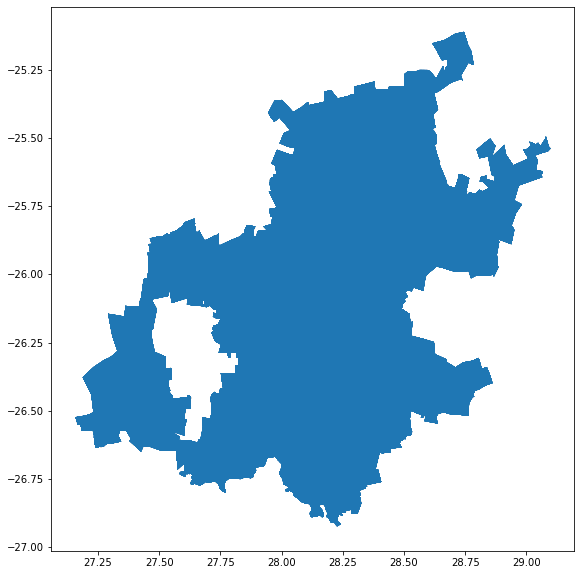

In [18]:
#First plotting of the map, to see if there are any major issues. There seems to be a gap in one ward, which is something I need to explore further.
wards.plot(figsize=(10,10))

In [19]:
#Now that the two files have been merged, I will do some cleaning of the data and delete the columns that I don't need. 

list(wards)

['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'ea_code',
 'sp_code',
 'sp_name',
 'mp_code',
 'mp_name',
 'duration',
 'date',
 'dwelling_count',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'A3_dwelling',
 'A3_dwelling_recode',
 'A3_recode_2',
 'Q1_01_02_people',
 'Q1_01_02_people_recode',
 'Q1_02_rooms',
 'Q1_03_households',
 'Q1_04_tenure',
 'Q1_05_Ownership',
 'Q1_06_renting',
 'Q1_07_water',
 'Q1_08_water200m',
 'Q1_09_greywater',
 'Q1_10_waterflow',
 'Q1_11_toilet',
 'Q1_12_leaks',
 'Q1_13_behaviour',
 'Q1_14_borehole',
 'Q1_15_rainwater',
 'Q1_16_water_truck',
 'Q1_17_Interuptions',
 'Q1_18_water_cost',
 'Q1_19_water_clean',
 'Q1_20_toilet',
 'Q1_21_removal',
 'Q1_22_rubbish',
 'Q1_23_recycle',
 'Q1_24_recycle_bags',
 'Q1_25_1',
 'Q1_25_2',
 'Q1_25_3',
 'Q1_25_4',
 '

In [20]:
columns_to_keep =['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'A3_dwelling',
 'Q3_01_birth_place',
 'Q3_01_recode',
 'Q3_02_country',
 'Q3_04_year_moved',
 'Q3_05_main_home',
 'Q3_06_home',
 'Q3_10_Retirement',
 'Q3_11_retirement_intention',
 'Q9_02_infl_dev',
 'Q9_10_BW_trust',
 'Q9_11_alienation',
 'Q9_12_foreigners',
 'Q9_15_Black_opport_more',
 'Q9_16_Violenc_LBG',
 'Q9_20_Interracial_dating',
 'Q15_01_education_recode',
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_03_registered_student',
 'Q15_04_disability',
 'Q15_05_head',
 'Q15_06_dependants',
 'Q15_07_dependants',
 'Q15_13_indigency_register',
 'Q15_14_formal',
 'Q15_15_informal',
 'Q15_20_income',
 'Q15_21_party_choice']

In [21]:
wards = wards[columns_to_keep]

In [22]:
wards.columns=['FID',
 'Province',
 'Municipality',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_race',
 'A2_Sex',
 'A3_dwelling',
 'Q3_01_birth_place',
 'Q3_01_recode',
 'Q3_02_country_born',
 'Q3_04_year_moved',
 'Q3_05_main_home',
 'Q3_06_home',
 'Q3_10_Retirement',
 'Q3_11_retirement_intention',
 'Q9_02_influence_developments',
 'Q9_10_BW_trust',
 'Q9_11_alienation',
 'Q9_12_foreigners',
 'Q9_15_Black_opport_more',
 'Q9_16_Violenc_LBG',
 'Q9_20_Interracial_dating',
 'Q15_01_education_recode',
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_03_registered_student',
 'Q15_04_disability',
 'Q15_05_head',
 'Q15_06_dependants',
 'Q15_07_dependants_live',
 'Q15_13_welfare',
 'Q15_14_formal',
 'Q15_15_informal',
 'Q15_20_income',
 'Q15_21_party_choice']

In [23]:
#Here I view all the respondents who said they were African and can see that this is 19864 of the over 26,000 respondents.
wards[wards.A1_race == 'African']

,FID,Province,Municipality,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q15_03_registered_student,Q15_04_disability,Q15_05_head,Q15_06_dependants,Q15_07_dependants_live,Q15_13_welfare,Q15_14_formal,Q15_15_informal,Q15_20_income,Q15_21_party_choice
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,Not disabled,Respondent,4,4,Don't know,No,Yes,R1 601 - R3 200,Don't know
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,Not disabled,Mother of respondent,4,3,Yes,Yes,No,R6 401 - R12 800,ANC (African National Congress)
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,Not disabled,Respondent,3,3,Yes,Yes,No,R1 601 - R3 200,ANC (African National Congress)
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,Sight disability,Father of respondent,5,5,Yes,Yes,No,R3 201 - R6 400,ANC (African National Congress)
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,Sight disability,Respondent,5,2,Don't know,No,No,Respondent refused,ANC (African National Congress)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,No,Not disabled,Spouse or partner of respondent,1,1.0,Don't know,No,Yes,R3 201 - R6 400,ANC (African National Congress)
23602,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,No,Not disabled,Respondent,2,0.0,No,No,Yes,R801 - R1 600,EFF (Economic Freedom Fighters)
23603,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,No,Not disabled,Spouse or partner of respondent,1,0.0,No,No,Yes,Respondent refused,EFF (Economic Freedom Fighters)
23604,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,No,Not disabled,Respondent,2,2.0,No,Yes,No,R6 401 - R12 800,EFF (Economic Freedom Fighters)


In [24]:
#Importing packages for mapping

import matplotlib.pyplot as plt
import numpy as np

In [25]:
#Recode BW trust variable as numeric in order to calculate the mean
wards[['Q9_10_BW_trust']]
wards [['bw_trust_2']]=np.nan
wards [['bw_trust_2']]

wards.loc[wards['Q9_10_BW_trust']=='Strongly disagree','bw_trust_2']=0
wards.loc[wards['Q9_10_BW_trust']=='Disagree','bw_trust_2']=1
wards.loc[wards['Q9_10_BW_trust']=='Neither agree nor disagree','bw_trust_2']=2
wards.loc[wards['Q9_10_BW_trust']=='Agree','bw_trust_2']=3
wards.loc[wards['Q9_10_BW_trust']=='Strongly agree','bw_trust_2']=4
wards [['Q9_10_BW_trust','bw_trust_2']]

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Q9_10_BW_trust,bw_trust_2
0,Strongly agree,4.0
1,Strongly agree,4.0
2,Agree,3.0
3,Strongly agree,4.0
4,Agree,3.0
...,...,...
23601,Disagree,1.0
23602,Agree,3.0
23603,Agree,3.0
23604,Disagree,1.0


In [26]:
#create ward level dataset with ward average bw_trust variable
wards_shp_bw = wards.groupby("WardID").mean('bw_trust_2') [["bw_trust_2"]]

# check ward level trust var
wards_shp_bw.head(3)

# merge ward level trust var back to ward level shape data (again)

wards_shp = wards_shp.merge(wards_shp_bw, on='WardID')

wards_shp.head(3)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,Shape__Are,Shape__Len,geometry,bw_trust_2
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,7.471513e+06,16412.790406,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481...",3.018182
1,2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,5.893438e+06,12204.147922,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493...",2.192982
2,2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,5.162054e+06,11148.288066,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470...",2.810345


<AxesSubplot:>

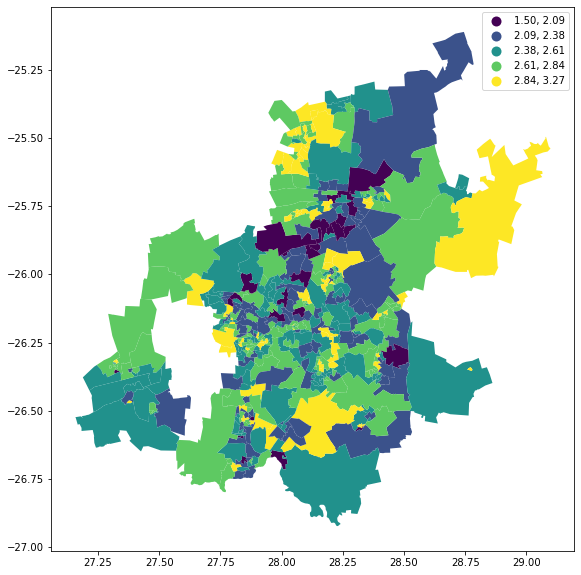

In [27]:
wards_shp.plot(figsize=(12,10),
                 column='bw_trust_2',
                 legend=True, 
                 scheme='NaturalBreaks')

In [28]:
#What we can see in this map is that those areas that are shaded darker, are areas where more people strongly disagreed with the statement that "Black and Whites will never really trust each other". The yellow shaded areas, are wards where respondents strongly agreed with the aforementioned statement. We can conclude that there is a lot of variation in trust across the Gauteng area. The reasons behind this I will explore in the coming week.